In [ ]:
def scheduler(L):
    """
    Question 1.1
    Schedule tasks using dependency list provided as input

    Input:
    L: Dependency list for tasks. L contains N sub-lists, and L[i] is a sub-list
    containing integers (the sub-list may also be empty). An integer, j, in this
    sub-list indicates that task j must be completed before task i can be started.

    Output:
    S: A list of integers corresponding to the schedule of tasks. S[i] indicates 
    the day on which task i should be carried out. Days are numbered starting
    from 0.

    Discussion: Add analysis here
    """
    # N - M empty sublists are dealt with directly
    C = [int(len(SL) == 0) for SL in L] # Labels for Completed(1)/Uncompleted(0) Tasks
    S = [0 for l in L] # S the output
    Q = [i for i, v in enumerate(C) if v == 0]# Queue for M tasks
    day = 1
    
    # Iterating through Queue, Q
    while len(Q) > 0:
        Q1 = Q.copy() # Copy of Q
        Qlength = len(Q) # Length of Q
        
        # Iterate through the queue once each day
        for _ in range(Qlength):
            i = Q.pop(0) # Remove task from front of queue
            S[i] = day # Assumes task is done on the day
            
            # Task that must be completed before task i can be started is not completed
            if sum([C[x] for x in L[i]]) < len(L[i]):
                Q1.remove(i) # Remove tasks not completed on the day
                Q.append(i) # Append to back of list
        
        # Indicate if task was completed after day is over
        for y in Q1:
            C[y] = 1
        
        day += 1

    return S

In [ ]:
def scheduler1(L):
    """
    Question 1.1
    Schedule tasks using dependency list provided as input

    Input:
    L: Dependency list for tasks. L contains N sub-lists, and L[i] is a sub-list
    containing integers (the sub-list may also be empty). An integer, j, in this
    sub-list indicates that task j must be completed before task i can be started.

    Output:
    S: A list of integers corresponding to the schedule of tasks. S[i] indicates 
    the day on which task i should be carried out. Days are numbered starting
    from 0.

    Discussion: Add analysis here
    """
    # N - M empty sublists are dealt with directly
    C = [0 for l in L] # Labels for Completed(1)/Uncompleted(0) Tasks
    S = [0 for l in L] # S the output
    Q = [] # Queue for M tasks
    day = 1
    
    for i, SL in enumerate(L):
        if len(SL) == 0:
            C[i] = 1
        else:
            Q.append(i)
    
    # Iterating through Queue, Q
    while len(Q) > 0:
        C1 = C.copy() # Copy of C (C from day - 1)
        Qlength = len(Q) # Length of Q
        
        # Iterate through the queue once each day
        for _ in range(Qlength):
            i = Q.pop(0) # Remove task from front of queue
            S[i] = day # Assumes task is done on the day
            
            # Task that must be completed before task i can be started is not completed
            if sum([C1[x] for x in L[i]]) < len(L[i]):
                Q.append(i) # Append to back of list
            else:
                C[i] = 1
        day += 1

    return S

In [89]:
def scheduler2(L):
    """
    Question 1.1
    Schedule tasks using dependency list provided as input

    Input:
    L: Dependency list for tasks. L contains N sub-lists, and L[i] is a sub-list
    containing integers (the sub-list may also be empty). An integer, j, in this
    sub-list indicates that task j must be completed before task i can be started.

    Output:
    S: A list of integers corresponding to the schedule of tasks. S[i] indicates 
    the day on which task i should be carried out. Days are numbered starting
    from 0.

    Discussion: Add analysis here
    """
    # N - M empty sublists are dealt with directly
    C = [0 for l in L] # Labels for Completed(1)/Uncompleted(0) Tasks
    S = [0 for l in L] # S the output
    Q = [] # Queue for M tasks
    day = 1
    
    for i, SL in enumerate(L):
        if len(SL) == 0:
            C[i] = 1
        else:
            Q.append(i)
    
    # Iterating through Queue, Q
    while len(Q) > 0:
        C1 = C.copy()
        for i in Q:
            if sum([C1[x] for x in L[i]]) == len(L[i]):
                Q.remove(i)
                C[i] = 1
                S[i] = day
        day += 1

    return S

In [90]:
timeit scheduler2(L)

80 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [82]:
L = [[], [], [1, 5], [], [3], [4], []]

In [ ]:
scheduler(L)

In [ ]:
% matplotlib inline

In [ ]:
import networkx as nx
import numpy as np

N = np.random.randint(50)
G = nx.erdos_renyi_graph(N, 0.05, directed=True)
nx.draw(G,with_labels=True)
print(N)

In [ ]:
L = [[] for l in G]
for key,val in G.adjacency():
    L[key] = list(val)  
L[29] =[]

In [83]:
L=[[], [0], [], [4, 5, 13], [14], [], [0, 30], [1, 12], [2, 7], [6, 10, 20],
        [8], [33], [32], [], [26, 32], [], [4], [15, 22, 30], [15], [11, 29],
        [13], [19], [4, 7], [1, 31], [22], [0, 22], [21], [], [], [], [], 
        [3, 6], [2, 11], []]

In [ ]:
for i, v in enumerate(L):
    print(i, v)

In [ ]:
timeit scheduler1(L)

In [ ]:
timeit scheduler2(L)

In [ ]:
"""Dijkstra algorithm implemented using dictionaries.
Note: Implementation is different from lecture 8 slides but similar
to the in-class example.
"""
import networkx as nx

def dijkstra(G,s):
    """Find shortest distances to s in weighted graph, G"""

    #Initialize dictionaries
    dinit = 10**6
    Edict = {} #Explored nodes
    Udict = {} #Uneplroed nodes

    for n in G.nodes():
        Udict[n] = dinit
    Udict[s]=0

    #Main search
    while len(Udict)>0:
        #Find node with min d in Udict and move to Edict
        dmin = dinit
        for n,w in Udict.items():
            if w<dmin:
                dmin=w
                nmin=n
        Edict[nmin] = Udict.pop(nmin)
        print("moved node", nmin)

        #Update provisional distances for unexplored neighbors of nmin
        for n,w in G.adj[nmin].items():
            if n in Udict:
                dcomp = dmin + w['weight']
                if dcomp<Udict[n]:
                    Udict[n]=dcomp

    return Edict

In [ ]:
def findPath(A,a0,amin,J1,J2):
    """
    Question 1.2 i)
    Search for feasible path for successful propagation of signal
    from node J1 to J2

    Input:
    A: Adjacency list for graph. A[i] is a sub-list containing two-element tuples (the
    sub-list my also be empty) of the form (j,Lij). The integer, j, indicates that there is a link
    between nodes i and j and Lij is the loss parameter for the link.

    a0: Initial amplitude of signal at node J1

    amin: If a>=amin when the signal reaches a junction, it is boosted to a0.
    Otherwise, the signal is discarded and has not successfully
    reached the junction.

    J1: Signal starts at node J1 with amplitude, a0
    J2: Function should determine if the signal can successfully reach node J2 from node J1

    Output:
    L: A list of integers corresponding to a feasible path from J1 to J2.

    Discussion: Add analysis here
    """

    # Initialize dictionaries of explored and unexplored junctions

    Edict = {} #Explored junctions
    Udict = {} #Unexplored junctions

    for i in range(len(A)):
        Udict[i] = 10**-6
    Udict[J1] = a0 # J1 as the starting junction

    # Main Search
    while (J2 in Udict) and (max(Udict.values()) > 10**-6):
        # Find junction with signal  a0*Lij > amin in Udict and move to Edict
        for junc, signal in Udict.items():
            if signal >= amin:
                chosen = junc
        
        Edict[chosen] = Udict.pop(chosen)

        #Update provisional signals for unexplored neighbors of chosen junction
        for junc_t in A[chosen]:
            if junc_t[0] in Udict:
                nsignal = a0 * junc_t[1]
                if nsignal >= max(amin, Udict[junc_t[0]]):
                    Udict[junc_t[0]] = a0 * junc_t[1]
                else:
                    Edict.pop(chosen)
    
    if J2 not in Edict: Edict = {}
    
    L = list(Edict.keys())
    
    return L

In [ ]:
def findPath1(A,a0,amin,J1,J2):
    """
    Question 1.2 i)
    Search for feasible path for successful propagation of signal
    from node J1 to J2

    Input:
    A: Adjacency list for graph. A[i] is a sub-list containing two-element tuples (the
    sub-list my also be empty) of the form (j,Lij). The integer, j, indicates that there is a link
    between nodes i and j and Lij is the loss parameter for the link.

    a0: Initial amplitude of signal at node J1

    amin: If a>=amin when the signal reaches a junction, it is boosted to a0.
    Otherwise, the signal is discarded and has not successfully
    reached the junction.

    J1: Signal starts at node J1 with amplitude, a0
    J2: Function should determine if the signal can successfully reach node J2 from node J1

    Output:
    L: A list of integers corresponding to a feasible path from J1 to J2.

    Discussion: Add analysis here
    """
    A1 = [[] for i in range(len(A))] # copy of A with edges that satisfy a0*Lij >= amin
    
    # Determining all edges where condition is satisfied (signal does not terminate)
    for i in range(len(A)):
        for pair in A[i]:
            if (a0*pair[1] >= amin) & (pair not in A1[i]):
                A1[i].append(pair)
                A1[pair[0]].append((i, pair[1]))

    Q = [J1] # Queue for unexplored junctions
    path = [[J1]] #Path
    L = []
    
    # Finding all possible paths from J1 to J2
    while len(Q) > 0:
        junction = Q.pop()
        path_i = path.pop()
        
        for n in A1[junction]:
            if n[0] not in path_i:
                if n[0] == J2:
                    L = path_i+[n[0]]
                    break
                else:
                    Q.append(n[0]) #add unexplored neighbors to back of queue
                    path.append(path_i+[n[0]])
                    
    return L

In [ ]:
A = [[(2, 0.8), (4, 0.7)], [], [(3, 0.9), (0, 0.8)], [(2, 0.9), (5, 0.6)], [(0, 0.7), (5, 0.9)], [(3, 0.6), (4, 0.9)]]



In [ ]:
B = [[], [], []]

In [ ]:
C = [[(1, 0.6), (2, 0.4), (6, 0.7), (7, 0.5)], [(0, 0.6), (7, 0.8)],
     [(0, 0.4), (6, 0.7)], [(4, 0.6), (7, 0.3)], [(3, 0.6), 
      (7, 0.9)], [], [(0, 0.7), (2, 0.7)], [(0, 0.5), (1, 0.8), 
      (3, 0.3), (4, 0.9)]]



In [ ]:
D = [[(1, 0.8), (4, 0.7)], [(0, 0.8), (2, 0.5), (3, 0.1)], [(1, 0.5), (4, 0.7)], [(4, 0.7), (1, 0.1)], [(0, 0.7), (3, 0.7), (2, 0.7)]]
D

In [ ]:
timeit findPath(C, 1.2, 0.72, 6, 7)

In [ ]:
timeit findPath1(C, 1.2, 0.72, 6, 7)

In [ ]:
findPath1(C, 1.2, 0.72, 6, 7)

In [ ]:
def a0min(A,amin,J1,J2):
    """
    Question 1.2 ii)
    Find minimum initial amplitude needed for signal to be able to
    successfully propagate from node J1 to J2 in network (defined by adjacency list, A)

    Input:`
    A: Adjacency list for graph. A[i] is a sub-list containing two-element tuples (the
    sub-list my also be empty) of the form (j,Lij). The integer, j, indicates that there is a link
    between nodes i and j and Lij is the loss parameter for the link.

    amin: Threshold for signal boost
    If a>=amin when the signal reaches a junction, it is boosted to a0.
    Otherwise, the signal is discarded and has not successfully
    reached the junction.

    J1: Signal starts at node J1 with amplitude, a0
    J2: Function should determine min(a0) needed so the signal can successfully
    reach node J2 from node J1

    Output:
    (a0min,L) a two element tuple containing:
    a0min: minimum initial amplitude needed for signal to successfully reach J2 from J1
    L: A list of integers corresponding to a feasible path from J1 to J2 with
    a0=a0min
    If no feasible path exists for any a0, return output as shown below.

    Discussion: Want to find the smallest loss parameter in a path with the largest loss parameters possible at each time. 
    Add analysis here (O(N+E), where E = number of edges between the N junctions)
    """

    # Initialize dictionaries of explored and unexplored junctions

    Edict = {} #Explored junctions
    Udict = {} #Unexplored junctions

    for i in range(len(A)):
        Udict[i] = -10**6
    Udict[J1] = 1 # J1 as the starting junction
    Q = [J1] # Starting indices

    # Main Search
    while (J2 in Udict) and (max(Udict.values()) > -10**6):
        # Find junction with signal  a0*Lij > amin in Udict and move to Edict
        for junc, signal in Udict.items():
            if signal == max(Udict.values()) and (junc in Q):
                chosen = junc

        Edict[chosen] = Udict.pop(chosen)

        #Update provisional signals for unexplored neighbors of chosen junction
        Q = []
        for junc_t in A[chosen]:
            if junc_t[0] in Udict:
                Q.append(junc_t[0])
                nloss = junc_t[1]
                if nloss > Udict[junc_t[0]]:
                    Udict[junc_t[0]] = nloss

    if J2 not in Edict: 
        Edict, Lmin = {}, -amin
    else:
        Lmin = min(Edict.values())
    
    output = amin/Lmin, list(Edict.keys()) #a0min = a0/minLoss
        
    return output

In [ ]:
def a0min1(A,amin,J1,J2):
    """
    Question 1.2 ii)
    Find minimum initial amplitude needed for signal to be able to
    successfully propagate from node J1 to J2 in network (defined by adjacency list, A)

    Input:`
    A: Adjacency list for graph. A[i] is a sub-list containing two-element tuples (the
    sub-list my also be empty) of the form (j,Lij). The integer, j, indicates that there is a link
    between nodes i and j and Lij is the loss parameter for the link.

    amin: Threshold for signal boost
    If a>=amin when the signal reaches a junction, it is boosted to a0.
    Otherwise, the signal is discarded and has not successfully
    reached the junction.

    J1: Signal starts at node J1 with amplitude, a0
    J2: Function should determine min(a0) needed so the signal can successfully
    reach node J2 from node J1

    Output:
    (a0min,L) a two element tuple containing:
    a0min: minimum initial amplitude needed for signal to successfully reach J2 from J1
    L: A list of integers corresponding to a feasible path from J1 to J2 with
    a0=a0min
    If no feasible path exists for any a0, return output as shown below.

    Discussion: Want to find the smallest loss parameter in a path with the largest loss parameters possible at each time. 
    Add analysis here (O(N+E), where E = number of edges between the N junctions)
    """

    # Initialize dictionaries of explored and unexplored junctions
    Q = [J1]
    path = [[J1]] #Path
    loss = [[1]] # List of loss parameters in path
    
    # Finding all possible paths from J1 to J2
    while len(Q) > 0:
        junction = Q.pop()
        path_i = path.pop()
        loss_i = loss.pop()
        
        for n in A[junction]:
            if n[0] not in path_i:
                if n[0] == J2:
                    path = [path_i+[n[0]]] + path
                    loss = [loss_i+[n[1]]] + loss
                    break
                else:
                    Q.append(n[0]) #add unexplored neighbors to back of queue
                    path.append(path_i+[n[0]])
                    loss.append(loss_i+[n[1]])

    # Finding highest minimum loss of all paths
    if path != []:
        loss = [min(l) for l in loss]
        for i, l in enumerate(loss):
            if l == max(loss):
                path_out = path[i]
            
        output = amin/max(loss), path_out
    else:
        output = -1, []

    return output

In [ ]:
e=[[1,2,3],[1,5,2],[2,5,1],[2,3,1],[3,4,2],[4,5,5],[4,6,1]]
G = nx.Graph()
G.add_weighted_edges_from(e)

In [ ]:
list(G.adjacency())

In [ ]:
dijkstra(G,1)

In [ ]:
timeit a0min1(C, 0.84, 6, 7)

In [ ]:
timeit a0min(C, 0.84, 6, 7)

In [1]:
import numpy as np
import networkx as nx
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def model1(G,x=0,params=(50,80,105,71,1,0),tf=6,Nt=400,display=False):
    """
    Question 2.1
    Simulate model with tau=0

    Input:
    G: Networkx graph
    params: contains model parameters, see code below.
    tf,Nt: Solutions Nt time steps from t=0 to t=tf (see code below)
    display: A plot of S(t) for the infected node is generated when true

    x: node which is initially infected

    Output:
    S: Array containing S(t) for infected node
    """
    a, theta0, theta1, g, k, tau = params
    tarray = np.linspace(0,tf,Nt+1)
    S = np.zeros(Nt+1)

    #Add code here
    # Precompute theta
    theta = theta0 + theta1*(1-np.sin(2*np.pi*tarray))
    # dt = tf/Nt = tarray[1]
    # arrays for V and I of affected node
    V = np.zeros(Nt+1)
    I = np.zeros(Nt+1)
    V[0], I[0], S[0] = 0.1, 0.05, 0.05 # Initial condition

    # Time marching
    for i in range(Nt):
        V[i+1] = V[i] + tarray[1]*(k - (k+theta[i]*S[i])*V[i])
        I[i+1] = I[i] + tarray[1]*(theta[i]*S[i]*V[i] - (a+k)*I[i])
        S[i+1] = S[i] + tarray[1]*(a*I[i]-(g+k)*S[i])


    if display:
        # Plot of S(t) for node x against time
        plt.figure()
        plt.plot(tarray, S)
        plt.title("Plot of S(t) for the infected node x = %d against time" %x)
        plt.xlabel("Time(t)")
        plt.ylabel("S(t)")

    return S

In [3]:
G = nx.Graph()
G.add_nodes_from(nodes)

NameError: name 'nodes' is not defined

In [79]:
def modelN(G,x=0,params=(50,80,105,71,1,0.01),tf=6,Nt=400,display=False):
    """
    Question 2.2
    Simulate model with tau>0

    Input:
    G: Networkx graph
    params: contains model parameters, see code below.
    tf,Nt: Solutions Nt time steps from t=0 to t=tf (see code below)
    display: A plot of S(t) for the infected node is generated when true

    x: node which is initially infected

    Output:
    Smean,Svar: Array containing mean and variance of S across network nodes at
                each time step.
    """
    a,theta0,theta1,g,k,tau=params
    tarray = np.linspace(0,tf,Nt+1)
    Smean = np.zeros(Nt+1)
    Svar = np.zeros(Nt+1)

    #Add code here
    A = nx.adjacency_matrix(G).toarray() #Adjacency Matrix
    q = A.sum(axis=1) #q[i] = q_i
    # Flux Matrix
    F = np.zeros(A.shape)
    for j in range(len(A)):
        denom = max(10**-6, np.dot(q, A[:, j])) # Ensures that denominator not 0 (prevents 0/0)
        F[:,j] =  q*A[:,j]/denom
    F = tau*F
    
    def RHS(y,t):
        """Compute RHS of model at time t
        input: y should be a 3N x 1 array containing with
        y[:N],y[N:2*N],y[2*N:3*N] corresponding to
        S on nodes 0 to N-1, I on nodes 0 to N-1, and
        V on nodes 0 to N-1, respectively.
        output: dy: also a 3N x 1 array corresponding to dy/dt

        Discussion: add discussion here
        """
        # Identifying S, I, V
        N = int(y.size/3)
        S, I, V = y[:N], y[N:2*N], y[2*N:3*N]
        
        # dy/dt = [dS/dt dI/dt dV/dt]
        dy = np.zeros(3*N)
        dy[:N] = a*I - (g+k)*S + np.dot(F, S) - S*np.sum(F, axis=0)
        dy[N:2*N] = (theta0 + theta1*(1 - np.sin(2*np.pi*t)))*S*V -(a+k)*I + np.dot(F, I) - I*np.sum(F, axis=0)
        dy[2*N:3*N] = k*(1-V) - (theta0 + theta1*(1 - np.sin(2*np.pi*t)))*S*V + np.dot(F,V) - V*np.sum(F, axis=0)
        
        return dy
    
    # Initial conditions
    N = len(G.nodes())
    y0 = np.zeros(2*N)
    y0 =np.append(y0, np.ones(N))
    y0[x], y0[N+x], y0[2*N+x] = 0.05, 0.05, 0.1
    
    # Optimising model for all nodes at the Nt timesteps
    y = odeint(RHS,y0,tarray)
    
    # Computing mean and variance across N at all Nt timesteps
    Smean = np.mean(y[:,:N], axis=1)
    Svar = np.var(y[:,:N], axis=1)
    Imean, Ivar = np.mean(y[:, N:2*N], axis=1), np.var(y[:, N:2*N], axis=1)
    Vmean, Vvar = np.mean(y[:, 2*N:3*N], axis=1), np.var(y[:, 2*N:3*N], axis=1)

    if display:
        # Plot of mean
        plt.figure()
        plt.plot(tarray, Smean)
        plt.title("Plot of average of S(t) across N nodes against time")
        plt.xlabel("Time(t)")
        plt.ylabel("$<S(t)>$")
        # Plot of variance
        plt.figure()
        plt.plot(tarray, Svar)
        plt.title("Plot of average of variance of S(t) across N nodes against time")
        plt.xlabel("Time(t)")
        plt.ylabel("$<(S(t) - <S(t)>)^2>$")
    return Smean,Svar, Imean, Ivar, Vmean, Vvar


In [71]:
def modelN1(G,x=0,params=(50,80,105,71,1,0.01),tf=6,Nt=400,display=False):
    """
    Question 2.2
    Simulate model with tau>0

    Input:
    G: Networkx graph
    params: contains model parameters, see code below.
    tf,Nt: Solutions Nt time steps from t=0 to t=tf (see code below)
    display: A plot of S(t) for the infected node is generated when true

    x: node which is initially infected

    Output:
    Smean,Svar: Array containing mean and variance of S across network nodes at
                each time step.
    """
    a,theta0,theta1,g,k,tau=params
    tarray = np.linspace(0,tf,Nt+1)
    Smean = np.zeros(Nt+1)
    Svar = np.zeros(Nt+1)

    #Add code here
    A = nx.adjacency_matrix(G).toarray() #Adjacency Matrix
    q = A.sum(axis=1) #q[i] = q_i
    # Flux Matrix
    F = np.zeros(A.shape)
    for j in range(len(A)):
        F[j,:] =  q[j]*A[j,:]
    for k in range(len(A)):
        denom = max(10**-6, np.dot(q, A[:, k])) # Ensures that denominator not 0 (prevents 0/0)
        F[:,k] = tau*F[:,k]/denom
    F = tau*F
    
    def RHS(y,t):
        """Compute RHS of model at time t
        input: y should be a 3N x 1 array containing with
        y[:N],y[N:2*N],y[2*N:3*N] corresponding to
        S on nodes 0 to N-1, I on nodes 0 to N-1, and
        V on nodes 0 to N-1, respectively.
        output: dy: also a 3N x 1 array corresponding to dy/dt

        Discussion: add discussion here
        """
        # Identifying S, I, V
        N = int(y.size/3)
        S, I, V = y[:N], y[N:2*N], y[2*N:3*N]
        
        # dy/dt = [dS/dt dI/dt dV/dt]
        dy = np.zeros(3*N)
        dy[:N] = a*I - (g+k)*S + np.dot(F, S) - S*np.sum(F, axis=0)
        dy[N:2*N] = (theta0 + theta1*(1 - np.sin(2*np.pi*t)))*S*V -(a+k)*I + np.dot(F, I) - I*np.sum(F, axis=0)
        dy[2*N:3*N] = k*(1-V) - (theta0 + theta1*(1 - np.sin(2*np.pi*t)))*S*V + np.dot(F,V) - V*np.sum(F, axis=0)
        
        return dy
    
    # Initial conditions
    N = len(G.nodes())
    y0 = np.zeros(2*N)
    y0 =np.append(y0, np.ones(N))
    y0[x], y0[N+x], y0[2*N+x] = 0.05, 0.05, 0.1
    
    # Optimising model for all nodes at the Nt timesteps
    y = odeint(RHS,y0,tarray)
    
    # Computing mean and variance across N at all Nt timesteps
    Smean = np.mean(y[:,:N], axis=1)
    Svar = np.var(y[:,:N], axis=1)
    Imean, Ivar = np.mean(y[:, N:2*N], axis=1), np.var(y[:, N:2*N], axis=1)
    Vmean, Vvar = np.mean(y[:, 2*N:3*N], axis=1), np.var(y[:, 2*N:3*N], axis=1)

    if display:
        # Plot of mean
        plt.figure()
        plt.plot(tarray, Smean)
        plt.title("Plot of average of S(t) across N nodes against time")
        plt.xlabel("Time(t)")
        plt.ylabel("$<S(t)>$")
        # Plot of variance
        plt.figure()
        plt.plot(tarray, Svar)
        plt.title("Plot of average of variance of S(t) across N nodes against time")
        plt.xlabel("Time(t)")
        plt.ylabel("$<(S(t) - <S(t)>)^2>$")
    return Smean,Svar, Imean, Ivar, Vmean, Vvar


In [21]:
G = nx.barabasi_albert_graph(100, 5)

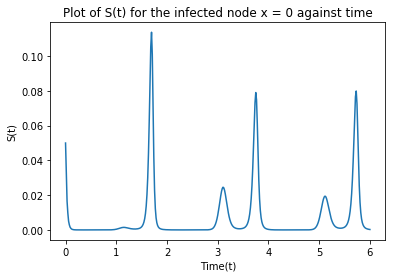

In [6]:
S = model1(G, display=True)

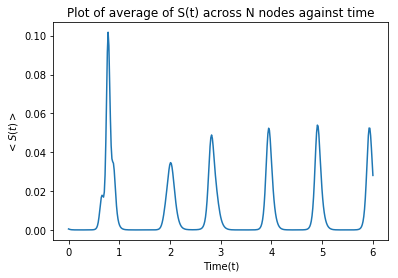

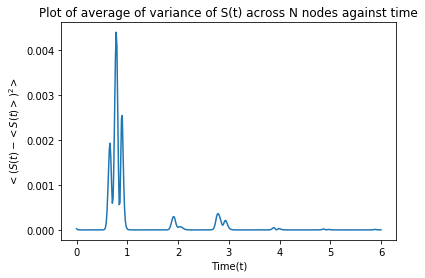

In [24]:
_,_ = modelN(G, display=True)

In [12]:
timeit modelN1(G)

32.9 s ± 480 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


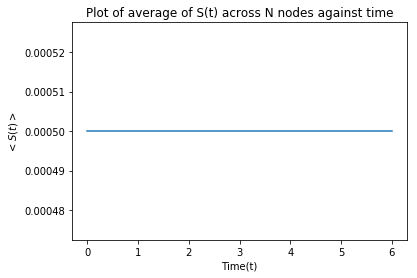

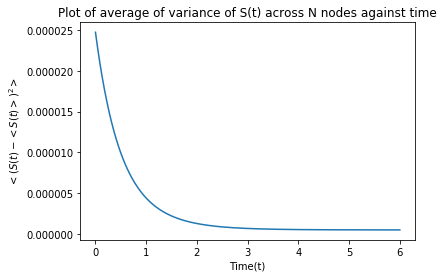

In [36]:
mean,var = modelN(G,params=(0,80,0,0,0,0.95), display=True)

In [83]:
def diffusion(input=(0, 100, 5, 12, 400), display=False):
    """Analyze similarities and differences
    between simplified infection model and linear diffusion on
    Barabasi-Albert networks.
    Modify input and output as needed.

    Discussion: add discussion here
    """
    
    x, n, m, tf, Nt = input
    G = nx.barabasi_albert_graph(n, m)
    tarray = np.linspace(0, tf, Nt+1)
    SSmean = np.zeros((Nt+1, 21))
    SSvar = np.zeros((Nt+1, 21))
    tauarray = np.linspace(0, 1, 21)
    
    for i, tau in enumerate(tauarray):
        SSmean[:,i], SSvar[:,i], _,_,_,_  = modelN(G, params = (0, 80, 0, 0, 0, tau), tf = tf, Nt = Nt)
            
    # Simplified Infection Model
    Smean, Svar, Imean,Ivar,Vmean,Vvar = modelN(G, params = (0, 80, 0, 0, 0, 0.95), tf = tf, Nt=Nt)
    
    #Linear Diffusion on Barabasi-Albert Networks
    L = nx.laplacian_matrix(G).toarray() #Adjacency Matrix
    e, v = np.linalg.eig(L)
    
    if display:
        plt.figure()
        plt.plot(tarray, Smean, label='Smean')
        plt.plot(tarray, Vmean, label='Vmean')
        plt.plot(tarray, Imean, label='Imean')
        plt.legend()
        plt.show()
        plt.figure()
        plt.plot(tarray, Svar, label='Svar')
        plt.plot(tarray, Vvar, label='Vvar')
        plt.plot(tarray, Ivar, label='Ivar')
        plt.legend()
        plt.show()
        plt.figure()
        plt.plot(tarray, np.mean(SSmean, axis=1))
        plt.xlabel('Time (t)')
        plt.ylabel('Mean of Simplified Infected Model')
        plt.title('Plot of Mean of Simplified Infected Model against Time, with varied $\tau$')
        plt.show()
        plt.figure()
        for i in range(21):
            plt.plot(tarray, SSvar[:,i], label="$\tau=$%f"%tauarray[i])
        plt.legend()
        plt.xlabel('Time (t)')
        plt.ylabel('Variance of Simplified Infected Model')
        plt.title('Plot of Variance of Simplified Infected Model against Time, with varied $\tau$')
        plt.show()
    return G, L #modify as needed

In [84]:
X = [[1, 2, 3], [1, 2, 3]]
np.mean(X,axis=1)

array([2., 2.])

ValueError: too many values to unpack (expected 2)

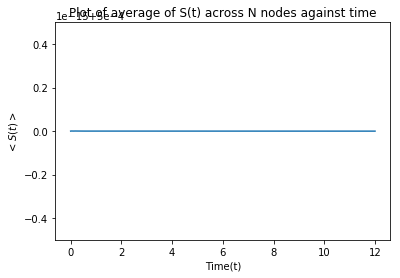

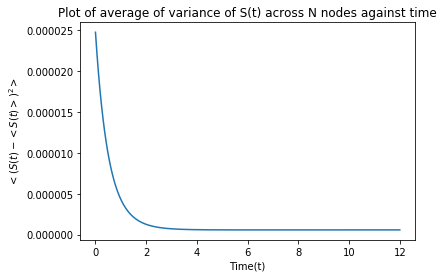

In [89]:
mean, var = modelN(G, params = (0, 80, 0, 0, 0, 0.95), tf = 12, Nt = 400, display=True)

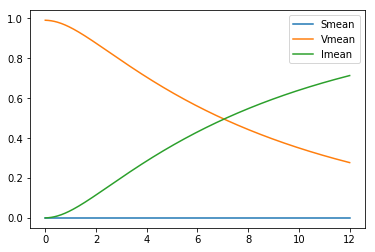

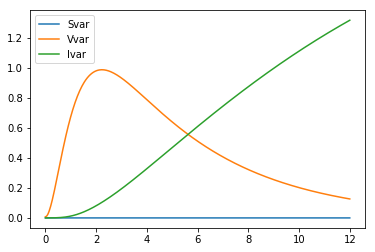

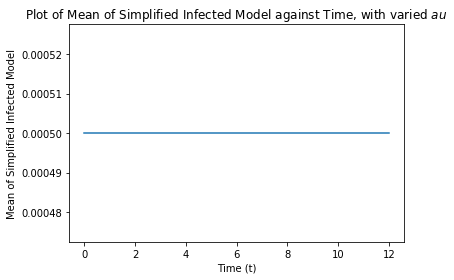

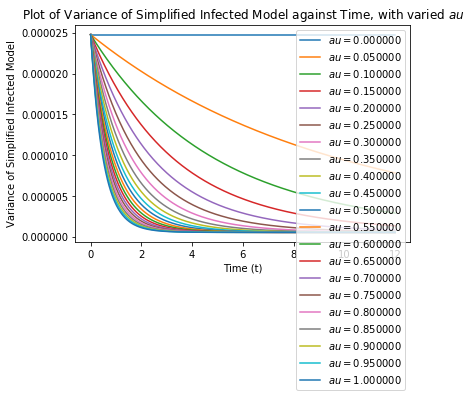

In [85]:
G, L = diffusion(input = (2, 100, 5, 12, 400), display=True)

In [ ]:
nx.adjacency_matrix(G).todense()

In [ ]:
d = np.array([d[1] for d in nx.degree(G)])
np.diag(d) - nx.adjacency_matrix(G).toarray()

In [ ]:
dt = 50/800
scipy.linalg.expm(L*dt)